In [1]:
'''Keras Demo Notesbook. Also see: https://keras.io/examples/vision/mnist_convnet/'''

import numpy as np
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib.pyplot import figure

2023-02-02 19:27:56.763819: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
print ("Model build done.")

Model build done.


2023-02-02 19:28:00.322676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

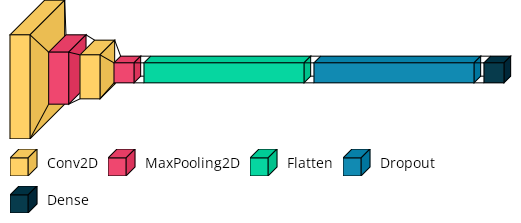

In [4]:
# Also see: https://www.analyticsvidhya.com/blog/2022/03/visualize-deep-learning-models-using-visualkeras/

import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("../rsc/OpenSans-Regular.ttf", 14)
# https://fonts.google.com/specimen/Open+Sans | Creative Commons: CC BY-SA 4.0
visualkeras.layered_view(model, legend=True, font=font) # selected font

## Prerequisites:

To run these you need to run the following in console:

* sudo add-apt-repository universe
* sudo apt update
* sudo apt upgrade
* sudo apt install graphviz


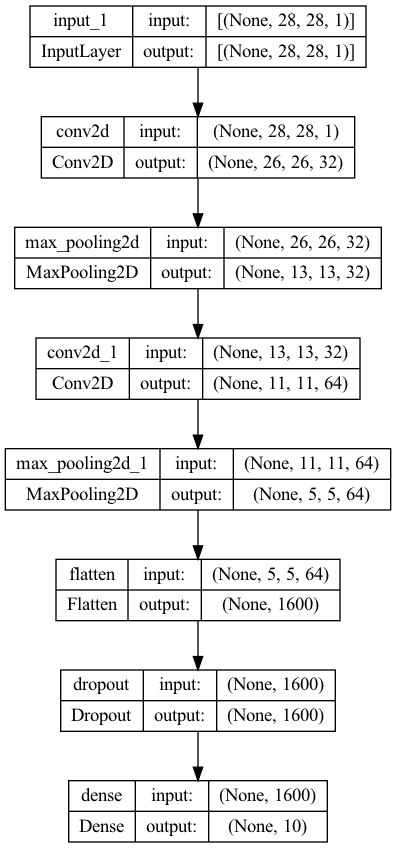

In [5]:
# Also see: https://pyimagesearch.com/2021/05/22/visualizing-network-architectures-using-keras-and-tensorflow/

from keras.utils.vis_utils import plot_model

plot_model(model, to_file='../img/model_plot.png', show_shapes=True, show_layer_names=True)

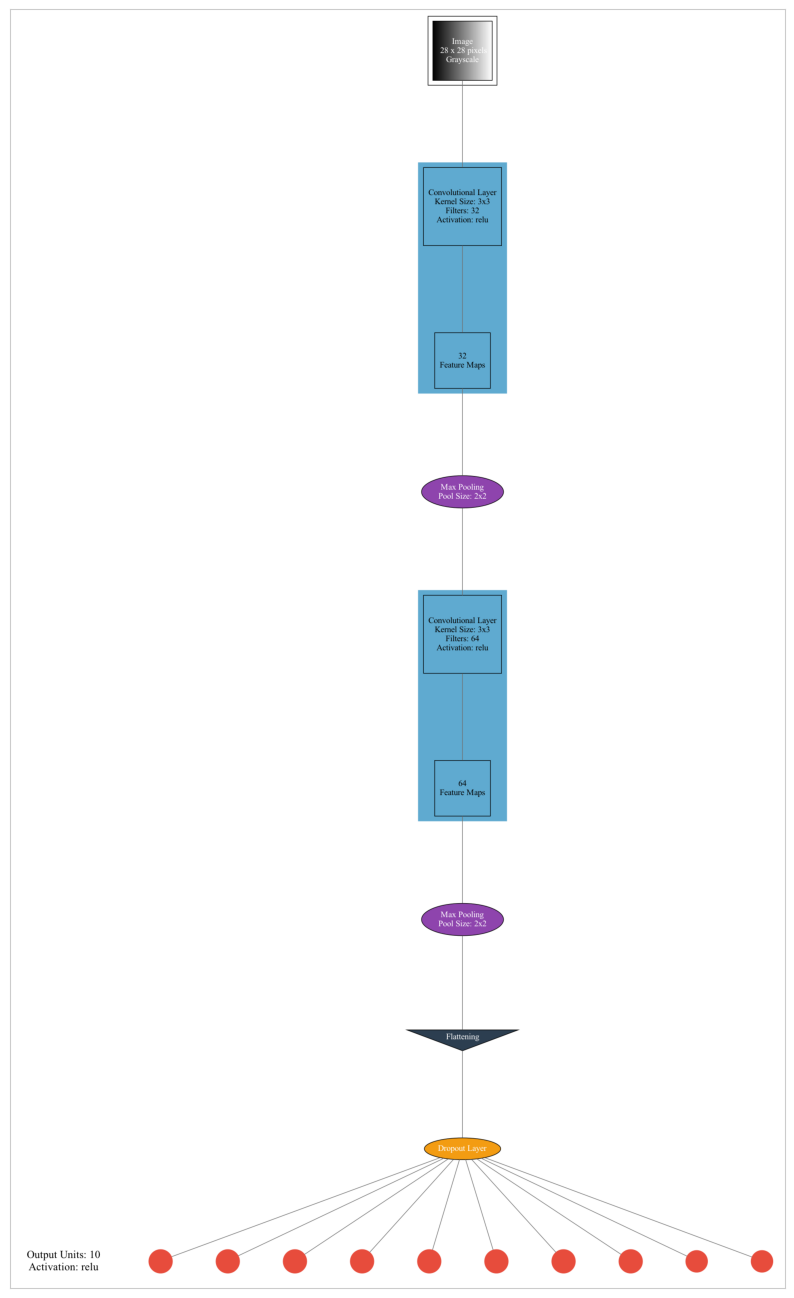

In [6]:
# also see: https://www.graphviz.org/download/
# https://towardsdatascience.com/visualizing-keras-models-4d0063c8805e
# https://www.analyticsvidhya.com/blog/2022/03/visualize-deep-learning-models-using-visualkeras/

from keras_visualizer import visualizer 
from matplotlib import image as mpimg

try:
    visualizer(model, format='png', view=False, filename='../img/viz')
except:
    print("") # ignore random file not found error from visualizer - we will load the image by ourselves:
    
image = mpimg.imread("../img/viz.png")
plt.figure(figsize=(10,20))
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.title='Model Visualization'
plt.imshow(image)
plt.show()
